<a href="https://colab.research.google.com/github/anushkaupadhyay/Python-Projects/blob/main/Mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv("/content/gdrive/My Drive/Projects/majorproject/train.csv")

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data.shape

(2000, 21)

In [ ]:
x_train_full =data.drop('price_range',axis=1)  
y_train_full =data['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train_full , y_train_full ,stratify=y_train_full,test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [ ]:
np.random.seed(41)

In [ ]:
tf.random.set_seed(41)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(300 , activation = 'relu' , input_shape = x_train.shape[1:]),
    keras.layers.Dense(60 , activation = 'relu'),
    keras.layers.Dense(60, activation = 'relu'),
    keras.layers.Dense(4,activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               6300      
                                                                 
 dense_1 (Dense)             (None, 60)                18060     
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 4)                 244       
                                                                 
Total params: 28,264
Trainable params: 28,264
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile( loss = 'sparse_categorical_crossentropy' , optimizer = 'sgd' , metrics = ['accuracy'])

In [ ]:
model_history = model.fit(x_train , y_train , epochs = 100)

Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 1.3599 - accuracy: 0.3113
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 1.2951 - accuracy: 0.4675
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 1.2156 - accuracy: 0.5494
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 1.1140 - accuracy: 0.5888
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.9982 - accuracy: 0.6150
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.8849 - accuracy: 0.6550
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7840 - accuracy: 0.7069
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.7962
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.8400
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5583 - accuracy: 0.8681
Epoch 11/

In [ ]:
mae_test = model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.9325


In [ ]:
y_pred = model.predict(x_test)

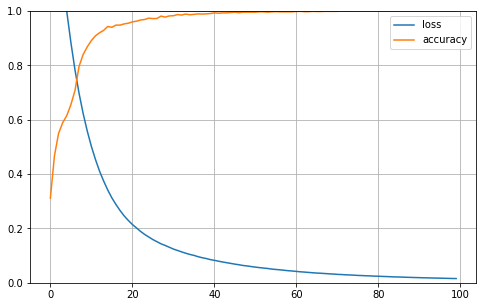

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
class_names = ['low cost','medium cost','high cost','very high cost']
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(0)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
y_predict = y_test[:3]
y_pred.round(0)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
target=pd.read_csv("/content/gdrive/My Drive/Projects/majorproject/test.csv")

In [ ]:
x_pred_full =target.drop('id',axis=1)  

In [ ]:
scaler = StandardScaler()
x_pred_full = scaler.fit_transform(x_pred_full)
y_pred_full = model.predict(x_pred_full)

In [ ]:
y_pred_full.round(0)

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
np.array(class_names)[y_pred_full.round(0).astype(int)]

array([['low cost', 'low cost', 'low cost', 'medium cost'],
       ['low cost', 'low cost', 'low cost', 'medium cost'],
       ['low cost', 'low cost', 'medium cost', 'low cost'],
       ...,
       ['low cost', 'medium cost', 'low cost', 'low cost'],
       ['low cost', 'low cost', 'medium cost', 'low cost'],
       ['low cost', 'low cost', 'medium cost', 'low cost']], dtype='<U14')